In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
df_index=pd.read_csv('economic_index.csv')

In [3]:
df_index.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [5]:
# drop unnecessary columns 
df_index.drop(columns=['Unnamed: 0', 'year','month'], axis=1,inplace=True)
df_index.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [6]:
## to check null values
df_index.isnull().sum()


interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

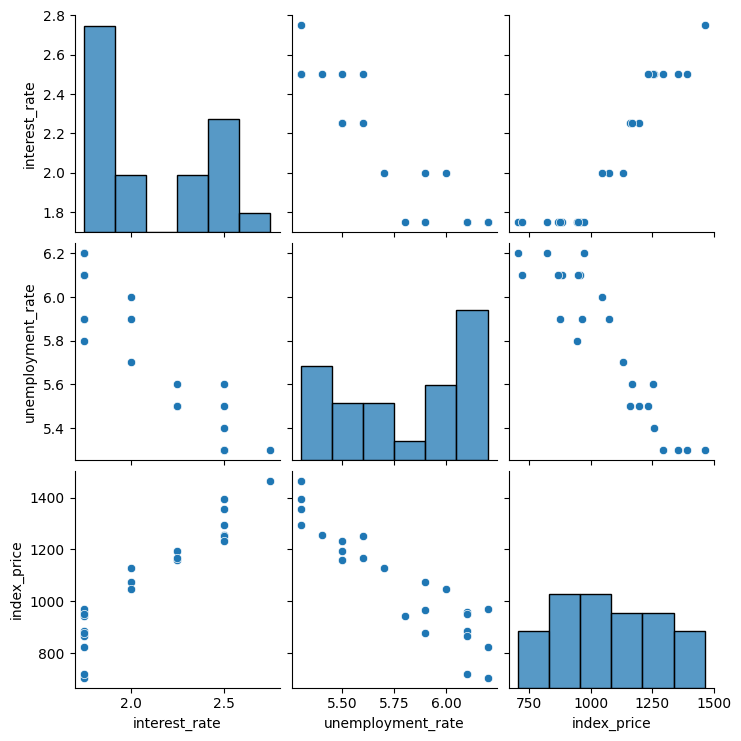

In [7]:
sns.pairplot(df_index)

In [9]:
df_index.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0, 0.5, 'unemployment_rate')

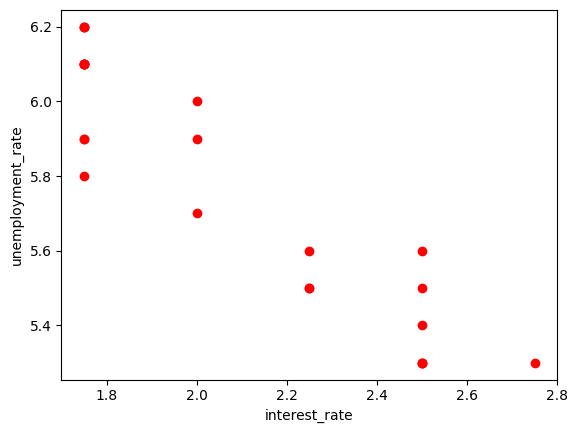

In [15]:
## visulaize the datapoints more closely
plt.scatter(df_index['interest_rate'],df_index['unemployment_rate'],color='red')
plt.xlabel("interest_rate")
plt.ylabel("unemployment_rate")


In [16]:
## independent and dependent feature
x=df_index.iloc[:, :-1]
y=df_index.iloc[:, -1]

In [17]:
x.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [18]:
y

0     1464
1     1394
2     1357
3     1293
4     1256
5     1254
6     1234
7     1195
8     1159
9     1167
10    1130
11    1075
12    1047
13     965
14     943
15     958
16     971
17     949
18     884
19     866
20     876
21     822
22     704
23     719
Name: index_price, dtype: int64

In [19]:
## split the dataset into training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)


<Axes: xlabel='interest_rate', ylabel='index_price'>

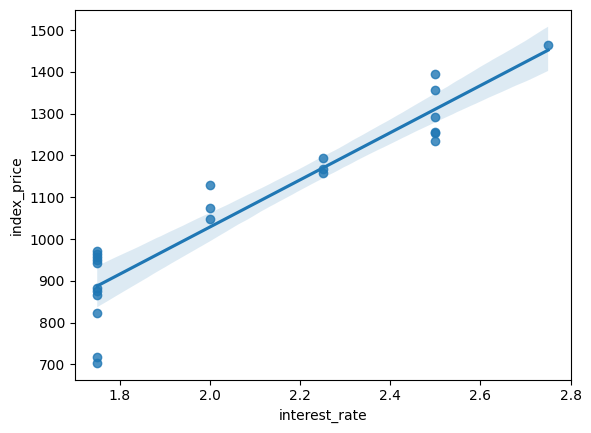

In [ ]:
sns.regplot(x=df_index['interest_rate'], y=df_index['index_price'])


<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

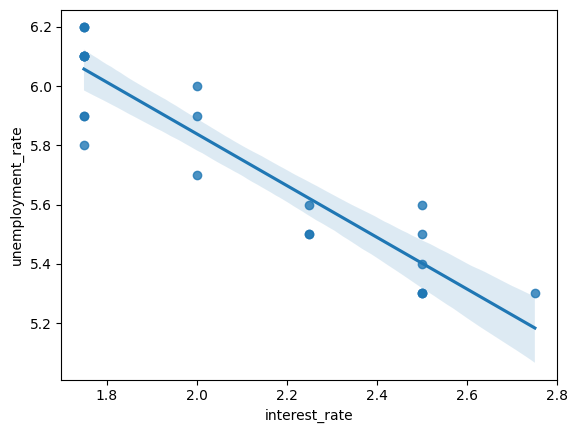

In [27]:
sns.regplot(x=df_index['interest_rate'], y=df_index['unemployment_rate'])


<Axes: xlabel='index_price', ylabel='unemployment_rate'>

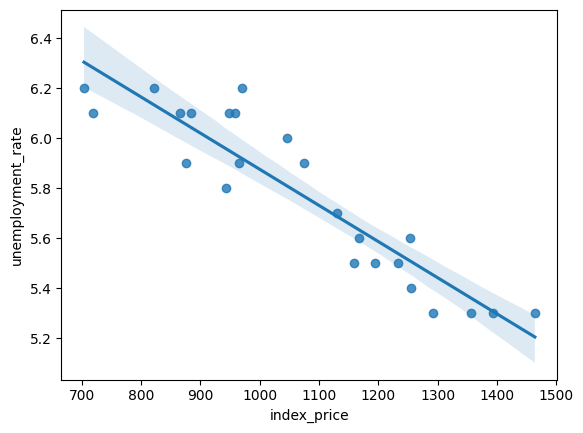

In [29]:
sns.regplot(y=df_index['unemployment_rate'], x=df_index['index_price'])

In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [32]:
x_train

array([[-0.90115511,  0.37908503],
       [ 1.31077107, -1.48187786],
       [-0.90115511,  1.30956648],
       [ 1.31077107, -0.55139641],
       [ 1.31077107, -1.48187786],
       [-0.16384638,  0.68924552],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -1.48187786],
       [ 1.31077107, -1.17171738],
       [-0.90115511,  1.30956648],
       [-0.90115511,  0.999406  ],
       [-0.90115511,  0.37908503],
       [-0.90115511,  0.999406  ],
       [ 0.57346234, -0.8615569 ],
       [-0.16384638, -0.24123593],
       [-0.90115511,  0.06892455],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -0.8615569 ]])

In [33]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [ ]:
## Cross validation  Cross-validation tests a model by splitting data into parts, training on some, and testing on others to ensure it works well on new data.
from sklearn.model_selection import cross_val_score
validation_score=cross_val_score(regression,x_train,y_train,scoring='neg_mean_squared_error',cv=3)
np.mean(validation_score)

np.float64(-5914.8281801623925)

In [37]:
## Predicting 
y_pred=regression.predict(x_test)
y_pred  

array([1204.22770398,  821.65051903, 1406.51300368,  857.70889608,
        994.90992298, 1168.16932693])

In [38]:
# performance metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [39]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print("Mean Squared Error: ", mse)
print("Mean Absolute Error: ", mae)
print("Root Mean Squared Error: ", rmse)

Mean Squared Error:  5793.7628877125835
Mean Absolute Error:  59.9357815232356
Root Mean Squared Error:  76.11677139574815


In [42]:
from sklearn.metrics import r2_score
r2=r2_score(y_test,y_pred)
print("R2 Score: ", r2)
# Adjusted R2
print("adjusted r2:",1-(1-r2)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))

R2 Score:  0.8278978091457141
adjusted r2: 0.7131630152428567


## Assumptions 

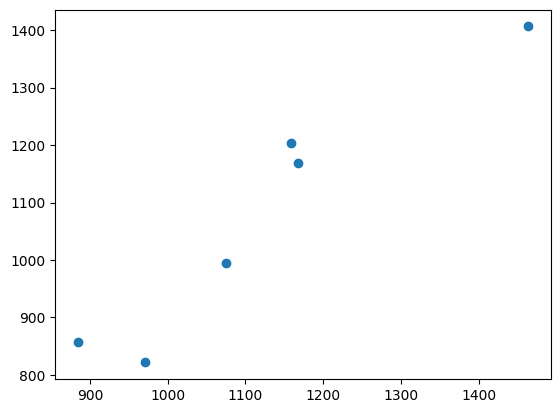

In [43]:
plt.scatter(y_test,y_pred)

In [44]:
residuals=y_test-y_pred
print(residuals)

8     -45.227704
16    149.349481
0      57.486996
18     26.291104
11     80.090077
9      -1.169327
Name: index_price, dtype: float64


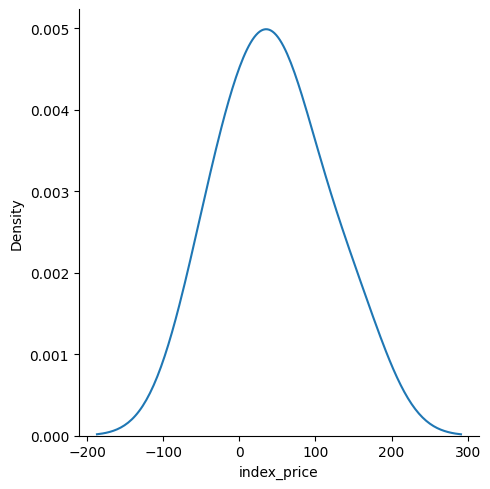

In [45]:
## plot this residuals
sns.displot(residuals,kind='kde')

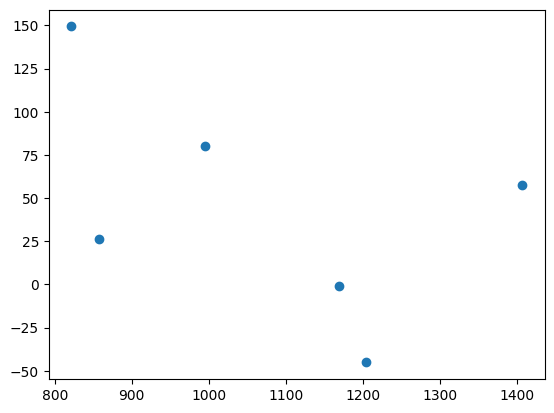

In [46]:
## scatter plot with respect to residuals and prediction
plt.scatter(y_pred,residuals)

In [47]:
## OlS method
import statsmodels.api as sm
model=sm.OLS(y_train,x_train).fit()


In [48]:
model.summary()

/Users/saketsmac/saket_udemy_ml/venv/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=18 observations were given.
  return hypotest_fun_in(*args, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Tue, 01 Apr 2025   Prob (F-statistic):                       0.754
Time:                        00:10:56   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            88.2728    658.295      0.134      0.895   -1307.250    1483.796
x2          -116.2572    658.295     -0.177      0.862   -1511.780    1279.266
==============================================================================
Omnibus:                        0.598   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.741   Jarque-Bera (JB):                0.567
Skew:                          -0.361   Prob(JB):                        0.753
Kurtosis:                       2.517   Cond. No.                         4.78
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
print(regression.coef_)

[  88.27275507 -116.25716066]
